In [3]:
import pandas as pd
import os
import numpy as np
# import geopandas as gpd
# import geoplot.crs as gcrs
# import geoplot as gplt
import seaborn as sns
import matplotlib.pyplot as plt
#from shapely.geometry import Point, Polygon
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import sys
%matplotlib inline 

In [27]:
San_Fran_path = r"C:\Users\DREADBORN\Desktop\AIS-SanFransisco"
San_Diego_path = r'C:\Users\DREADBORN\Desktop\AIS-Sandiego'
Norfolk_path = r'C:\Users\DREADBORN\Desktop\AIS-Norfolk'


In [3]:
files_csv = [f for f in files if f[-4:] == 'csv']
files_csv

['WorkOrder8180645_NAIS_2018-01.xlsx', 'WorkOrder8180645_NAIS_2018-02.xlsx']

In [ ]:
#df = pd.DataFrame()
#for f in files_csv:
#    data = pd.read_excel(f, sort=True)
#    df = df.append(data)

In [ ]:
#df

In [ ]:
#------------------------------------------------------------------------------------

In [4]:
San_fran = gdp.read_file('bayarea_allwater.shp')
San_fran

NameError: name 'gdp' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
San_fran.plot(ax=ax, alpha =1, color = 'grey')

In [ ]:
ship = pd.read_excel('WorkOrder8180645_NAIS_2018-01.xlsx')

In [ ]:
ship

In [ ]:
crs = {'init': 'espg:4326'}
geometry = [Point(xy) for xy in zip(ship['LON_AVG'], ship['LAT_AVG'])]

geometry[:5]

In [ ]:
geo_ship = gpd.GeoDataFrame(ship, crs=crs, geometry=geometry)
geo_ship.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
San_fran.plot(ax=ax, alpha=1, color = 'grey')
geo_ship.plot(ax=ax, markersize = 10, color ='blue', marker= 'o', label= 'lat/lon')

In [ ]:
#Geoplot
#----------------------------------------------------------#
#Ship calc

In [30]:
os.chdir(San_Fran_path)
files = os.listdir(San_Fran_path)
files[0]

'WorkOrder8180645_NAIS_2018-01.csv'

In [36]:
files
ship = pd.read_csv(files[0],  keep_default_na=False)
ship

,MSG_TYPE,MMSI,NAME,IMO_NUMBER,CALL_SIGN,LAT_AVG,LON_AVG,PERIOD,SPEED_KNOTS,COG_DEG,...,NAV_STATUS,NAV_SENSOR,SHIP_AND_CARGO_TYPE,DRAUGHT,DIM_BOW,DIM_STERN,DIM_PORT,DIM_STARBOARD,MMSI_COUNTRY_CD,RECEIVER
0,18,235088685,AC-RELIANCE,None,2EWE5,37.502350,-122.480915,2018-01-01 00:00:00.000,0.0,82.4,...,None,None,37,None,4,5,1,2,None,D11MN-SF-EAGBS1
1,3,303865000,CG ASPEN,9259147,NTUG,37.808610,-122.360944,2018-01-01 00:00:00.000,0.0,267.4,...,5,0,55,4.0,21,47,9,5,None,VTS11-SF-WGE1
2,3,303944000,CAPE HORN,7704942,KMJS,37.773669,-122.381433,2018-01-01 00:00:00.000,0.0,217.7,...,5,1,70,7.6,172,56,12,20,None,D11MN-SF-EAGBS1
3,3,303945000,CAPE HUDSON,7704930,KMJN,37.773705,-122.381052,2018-01-01 00:00:00.000,0.0,327.4,...,5,1,35,7.9,174,54,16,16,None,D14MN-GU-MERBS1
4,18,338044878,GRECIAN FORMULA,None,C5689JU,37.663924,-122.381128,2018-01-01 00:00:00.000,0.0,15.9,...,None,None,37,None,6,4,2,2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307241,18,367593450,SEA QUEEN IIA,None,WDH2007,37.809798,-122.418456,2018-02-01 00:00:00.000,0.0,None,...,None,None,30,None,5,21,3,3,US,D11MN-SF-EAGBS1
307242,18,367651850,MAJOR STEPPEN STONE,None,WDH7810,37.501895,-122.480835,2018-02-01 00:00:00.000,0.0,None,...,None,None,30,None,3,10,1,3,US,D11MN-HB-POIBS1
307243,18,367707220,ST JOSEPH,None,DWI5304,37.809698,-122.418604,2018-02-01 00:00:00.000,.1,216.6,...,None,None,30,None,4,26,4,4,US,D14MN-HO-KAWBS1
307244,18,367758740,FV MISS MORIAH,None,WDJ2479,37.502036,-122.482599,2018-02-01 00:00:00.000,0.0,336.9,...,None,None,30,None,3,15,3,3,US,D11MN-HB-CPMBS1


In [37]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307246 entries, 0 to 307245
Data columns (total 21 columns):
MSG_TYPE               307246 non-null int64
MMSI                   307246 non-null int64
NAME                   307246 non-null object
IMO_NUMBER             307246 non-null object
CALL_SIGN              307246 non-null object
LAT_AVG                307246 non-null float64
LON_AVG                307246 non-null float64
PERIOD                 307246 non-null object
SPEED_KNOTS            307246 non-null object
COG_DEG                307246 non-null object
HEADING_DEG            307246 non-null object
NAV_STATUS             307246 non-null object
NAV_SENSOR             307246 non-null object
SHIP_AND_CARGO_TYPE    307246 non-null object
DRAUGHT                307246 non-null object
DIM_BOW                307246 non-null object
DIM_STERN              307246 non-null object
DIM_PORT               307246 non-null object
DIM_STARBOARD          307246 non-null object
MMSI_COUNTRY_CD

In [66]:
ship_DIM = ship.groupby(['DIM_BOW', 'DIM_STERN', 'DIM_PORT', 'DIM_STARBOARD'])["MMSI"].count()
#ship["CALL_SIGN"].unique()
#ship["NAME"].unique()
ship_DIM

DIM_BOW  DIM_STERN  DIM_PORT  DIM_STARBOARD
0        0          0         0                10113
         7          0         3                   20
         12         0         3                   63
         13         3         1                    4
         26         0         10                  54
                                               ...  
9        4          2         2                  181
         5          2         2                   25
                    3         4                   16
         9          2         1                   97
None     None       None      None                 5
Name: MMSI, Length: 773, dtype: int64

In [41]:
#ship.groupby('CALL_SIGN').size()
ship.groupby('DRAUGHT').size()

DRAUGHT
0.0      40562
0.2        414
0.4       4461
0.7          8
1.0        924
         ...  
9.6         91
9.7         16
9.8         23
9.9         32
None    138140
Length: 118, dtype: int64

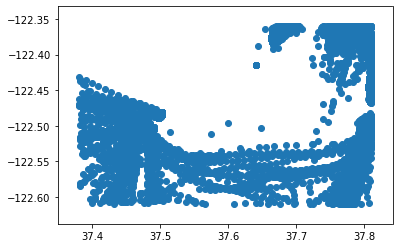

In [42]:
plt.scatter(ship['LAT_AVG'], ship['LON_AVG'])

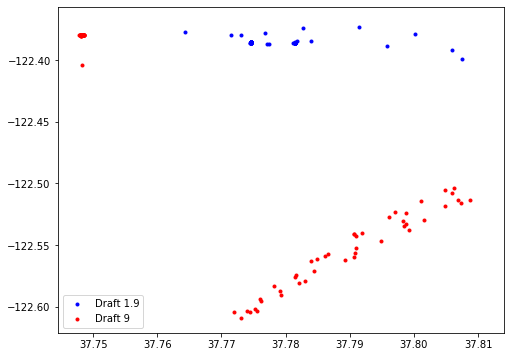

In [43]:
Dft1 = ship[ship['DRAUGHT'] == '1.9']
Dft9 = ship[ship['DRAUGHT'] == '9.0']
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(Dft1['LAT_AVG'], Dft1['LON_AVG'], c='b', marker=".", label='Draft 1.9')
ax1.scatter(Dft9['LAT_AVG'], Dft9['LON_AVG'], c='r', marker=".", label='Draft 9')
plt.legend(loc='lower left');
plt.show()

In [44]:
Dft9.groupby('CALL_SIGN').size()

CALL_SIGN
NAMW       8784
WABS         12
WDD7294      33
dtype: int64

In [51]:
ship['PERIOD']

0         2018-01-01 00:00:00.000
1         2018-01-01 00:00:00.000
2         2018-01-01 00:00:00.000
3         2018-01-01 00:00:00.000
4         2018-01-01 00:00:00.000
                   ...           
307241    2018-02-01 00:00:00.000
307242    2018-02-01 00:00:00.000
307243    2018-02-01 00:00:00.000
307244    2018-02-01 00:00:00.000
307245    2018-02-01 00:00:00.000
Name: PERIOD, Length: 307246, dtype: object

In [45]:
ship["DAY"] = ship['PERIOD'].dt.date
ship.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [52]:
ship['PERIOD'] = pd.to_datetime(ship['PERIOD'])
#ship.tail(100)
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307246 entries, 0 to 307245
Data columns (total 21 columns):
MSG_TYPE               307246 non-null int64
MMSI                   307246 non-null int64
NAME                   307246 non-null object
IMO_NUMBER             307246 non-null object
CALL_SIGN              307246 non-null object
LAT_AVG                307246 non-null float64
LON_AVG                307246 non-null float64
PERIOD                 307246 non-null datetime64[ns]
SPEED_KNOTS            307246 non-null object
COG_DEG                307246 non-null object
HEADING_DEG            307246 non-null object
NAV_STATUS             307246 non-null object
NAV_SENSOR             307246 non-null object
SHIP_AND_CARGO_TYPE    307246 non-null object
DRAUGHT                307246 non-null object
DIM_BOW                307246 non-null object
DIM_STERN              307246 non-null object
DIM_PORT               307246 non-null object
DIM_STARBOARD          307246 non-null object
MMSI_CO

In [53]:
ship['PERIOD']

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
307241   2018-02-01
307242   2018-02-01
307243   2018-02-01
307244   2018-02-01
307245   2018-02-01
Name: PERIOD, Length: 307246, dtype: datetime64[ns]

In [46]:
def extract_feature(ship):
    distance = np.sqrt(((ship['LAT_AVG'].diff())**2) + ((ship['LON_AVG'].diff())**2))
    interval = ship['PERIOD'].diff().astype(np.int64)/1e9
    velocity = distance/interval
    Vel_mean = velocity.mean()
    Vel_stdv = velocity.std()
    return pd.Series({'Vm' :Vel_mean, 'Vs': Vel_stdv})

In [54]:
ship.groupby(["MMSI", "PERIOD"]).apply(extract_feature)

KeyboardInterrupt: 

In [ ]:
############################
############################
############################
############################

In [ ]:
#preprocessing Data
bins = (-0.5, 0.5, 1.5)
group_names = ['bad', 'good']
ship['legitimate'] = pd.cut(Mal['legitimate'], bins = bins, labels = group_names)
ship['legitimate'].unique() 

In [ ]:
#differentiating good=1 and bad=0
label_InitialSize = LabelEncoder() 

In [ ]:
Mal['legitimate'] = label_InitialSize.fit_transform(Mal['legitimate'])

In [ ]:
Mal['legitimate'].value_counts()

In [ ]:
#sns.countplot(Mal['legitimate'])

In [ ]:
#Seperate our data set as response variable and feature variables
#legitimate is the feature that will predict the quality
X = Mal.drop('legitimate', axis = 1) #predict the quality 
y = Mal['legitimate'] #quality itself

In [ ]:
#train and test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 31)

In [ ]:
len(X_train)

In [ ]:
#to get optimized results
#values are huge, biased results
#scaler fixed that
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:2]

# SVM Classifier

In [ ]:
#Support Vector Model
#better on smaller number
#Faster and easiest to apply model on
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

# Random Forest

In [ ]:
#best for medium size data set
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
#X_test[:20]

In [ ]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

# Neural Network

In [ ]:
#deep learning
#works best on large dataset and text data
#hidden laers = nodes
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

In [ ]:
Mal.head()

In [ ]:
XNewPre = [[332, 224, 258, 9, 0, 361984, 115712, 0, 6135, 4096, 372736, 4194304, 4096, 512, 0, 0, 1036288, 1024, 485887, 16, 1024, 1048576, 4096, 1048576, 4096, 0, 16]]
ANewPre = [[332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936,4096,512,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16
]]
DNewPre = [[332,224,33166,2,25,60928,55296,0,13848,4096,65536,4194304,4096,512,4,0,135168,1024,0,2,0,1048576,16384,1048576,4096,0,16
]]
XNewPre = sc.transform(XNewPre)
ANewPre = sc.transform(ANewPre)
DnewPre = sc.transform(DNewPre)
BNewPre = rfc.predict(XNewPre)
YNewPre = rfc.predict(ANewPre)
QNewPre = rfc.predict(DNewPre)
print(YNewPre, BNewPre, QNewPre)

In [ ]:
NewMal = pd.read_csv('final.csv')

In [ ]:
NewMal.head() 

In [ ]:
k=[]
for i in range(0, len(NewMal)):
    k.append([])
    k[i].append(NewMal.loc[i][0])

NewMal = NewMal.drop('Name', axis=1)
NewMal = NewMal.drop('md5', axis=1)
NewMal = NewMal.drop('legitimate', axis=1)
NewMal = NewMal.drop('Win32VersionValue', axis=1)
NewMal.head()

In [ ]:
X = []
Y = []
for i in range(0, len(NewMal)):
    X.append([])
    for x in NewMal:
        X[i].append(NewMal.loc[i][x])
    X[i]=[X[i]]
    
    Y = sc.transform(X[i])      #scalar transform before running
    DNewPre = rfc.predict(Y)    #prediction value 1
    print(k[i], 'is', DNewPre)

        

In [ ]:
print(NewMal.loc[1][0])